<a href="https://colab.research.google.com/github/ngonhan2k5/cs-ml/blob/master/proj1/AUC_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [45]:
#load data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', skipinitialspace=True, na_values="?")

# kNN

# Decision Tree

In [50]:
def decision_tree(df):
  df.columns = ['age', 'workclass', 'fnlwgt', 'education', 
                     'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
                     'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
  df.sample(4)

  #remove records missing values
  no_missing_df= df.drop(df[df.native_country.isnull()].index)
  no_missing_df= no_missing_df.drop(no_missing_df[no_missing_df.workclass.isnull()].index)
  no_missing_df= no_missing_df.drop(no_missing_df[no_missing_df.occupation.isnull()].index)
  no_missing_df.isnull().sum().max() #just checking that there's no missing data missing...

  #LabelEncoder
  from sklearn.preprocessing import LabelEncoder
  le= LabelEncoder()
  no_missing_df['workclass_num']= le.fit_transform(no_missing_df['workclass'])
  no_missing_df['marital_status_num']= le.fit_transform(no_missing_df['marital_status'])
  no_missing_df['occupation_num']= le.fit_transform(no_missing_df['occupation'])
  no_missing_df['relationship_num']= le.fit_transform(no_missing_df['relationship'])
  no_missing_df['race_num']= le.fit_transform(no_missing_df['race'])
  no_missing_df['sex_num']= le.fit_transform(no_missing_df['sex'])
  no_missing_df['native_country_num']= le.fit_transform(no_missing_df['native_country'])
  no_missing_df['income_num']= le.fit_transform(no_missing_df['income'])

  #remove the unnecessary features
  neccessary_columns_df= no_missing_df.drop(columns=['fnlwgt', 'education', 'workclass', 'income', 'marital_status', 'occupation', 'sex', 'relationship', 'native_country', 'race'])

  #separate input and target
  X= neccessary_columns_df.drop('income_num', axis='columns')
  y= neccessary_columns_df['income_num']

  #Shuffle and Split data into Training, Testing dataframe
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=1)
  print("Training Data:", X_train.shape, y_train.shape)
  print("Testing Data :", X_test.shape, y_test.shape)
  print('Train: {}% | Test {}%'.format(round(len(y_train)/len(y),2), round(len(y_test)/len(y),2)))

  from sklearn.tree import DecisionTreeClassifier
  best_clf= DecisionTreeClassifier(criterion= 'gini', max_depth=9, min_samples_leaf=3, min_samples_split=8)
  best_clf= best_clf.fit(X_train, y_train)
  score= best_clf.score(X_test, y_test)
  return X_test, y_test, best_clf


In [66]:
X_test_dt, y_test_dt, dt_clf= decision_tree(df)

Training Data: (21112, 12) (21112,)
Testing Data : (9049, 12) (9049,)
Train: 0.7% | Test 0.3%


## SVM

# Logit

In [63]:
def logit(df):
  # import pandas as pd 
  # df = pd.read_csv("./adult.csv", skipinitialspace=True, na_values="?")

  df.columns = ['age', 'workclass', 'fnlwgt', 'education', 
                      'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
                      'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
  for col in ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']:
      df[col] = df[col].astype('category')      
  #print(df.dtypes)

  category_columns = list(df.select_dtypes(include=['category']).columns)
  #print(category_columns)

  numberic_columns = list(df.select_dtypes(include=['int64']).columns)
  #because education_num had relationship with educatoin
  numberic_columns.remove('education_num')
  #print(numberic_columns)

  # remove rows with missing values
  for col in category_columns:
      df = df[df[col].str.contains("\\?") == False]
  nrow2 = df.shape[0]
  # print(nrow2)

  # df['income'].unique()

  # import seaborn as sns
  # sns.set(font_scale=1.5)

  # import matplotlib.pyplot as plt
  # df_low_income = df[df['income'] == '<=50K']
  # for col in category_columns:
  #     total_column = df[col].unique().size
  #     f, ax = plt.subplots(figsize=(14, total_column))
      
  #     sns.set_color_codes("pastel")
  #     sns.countplot(y=col, data=df, color="b", label=">50K")
      
  #     sns.set_color_codes("muted")
  #     sns.countplot(y=col, data=df_low_income, color="b", label="<=50K")
      
  #     max = df[col].value_counts().max()
  #     ax.set(xlim=(0, max * 1.05), ylabel="", xlabel=col)
      
  #     # Add a legend and informative axis label
  #     ax.legend(ncol=2, loc="lower right", frameon=True)

  df.income = df.income.apply(lambda x:0 if x=='<=50K' else 1)
  df.income.head()

  # one hot encoding sex 
  one_hot_coding =  pd.get_dummies(df[['workclass',
  'education',
  'marital_status',
  'occupation',
  'relationship',
  'race',
  'sex']])
  one_hot_coding.head()

  
  columns = list(one_hot_coding.columns) 
  columns

  combined = pd.concat([df['income'], df[numberic_columns], one_hot_coding], axis=1)
  combined.head()

  # X = df[['age', 'workclass', 'fnlwgt', 'educatoin', 'educatoin_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week']]
  X = combined[columns]
  y = combined['income']

  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                      random_state=42,
                                                      stratify=y,
                                                      test_size=0.1)
  
  
  from sklearn.linear_model import LogisticRegression
  logreg = LogisticRegression(max_iter=1000)
  logreg.fit(X_train, y_train)
  y_pred = logreg.predict(X_test)
  print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
  return X_test, y_test, logreg

In [67]:
X_test_logit, y_test_logit, logit_clf= logit(df)

Accuracy of logistic regression classifier on test set: 0.83


# Random Forest

## AUC Curve

In [20]:
X_test, y_test, dt_clf= decision_tree()

Training Data: (21112, 12) (21112,)
Testing Data : (9049, 12) (9049,)
Train: 0.7% | Test 0.3%


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

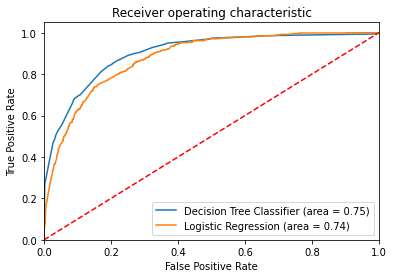

In [68]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

plt.figure()

#Decision Tree
dt_roc_auc = roc_auc_score(y_test_dt, dt_clf.predict(X_test_dt))
fpr, tpr, thresholds = roc_curve(y_test_dt, dt_clf.predict_proba(X_test_dt)[:,1])
plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % dt_roc_auc)

#Logit
logit_roc_auc = roc_auc_score(y_test_logit, logit_clf.predict(X_test_logit))
fpr, tpr, thresholds = roc_curve(y_test_logit, logit_clf.predict_proba(X_test_logit)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('dt_ROC')
plt.show()